In [44]:
import os 
import sys
# Ajouter le chemin du répertoire parent de cifar10_classification
project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)
print(project_path)

/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar


In [45]:
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from cifar10_classification.plots import plot_confusion_matrix, plot_roc_curve
from cifar10_classification.dataset import prepare_data
from cifar10_classification.features import extract_features
from cifar10_classification.modeling.predict import predict_model
from cifar10_classification.config import LABEL_NAMES, NUM_CLASSES, DATA_DIR, MODEL_DIR


In [46]:
# Chemins vers les modèles sauvegardés
MODEL_PATHS = {
    'logistic_hog': MODEL_DIR + '/logistic_hog_best_model.pkl',
    'logistic_sift': MODEL_DIR + '/logistic_sift_best_model.pkl',
    'logistic_flatten': MODEL_DIR + '/logistic_flatten_best_model.pkl',
    'random_forest_flatten': MODEL_DIR + '/random_forest_flatten_best_model.pkl',
    'random_forest_sift': MODEL_DIR + '/random_forest_sift_best_model.pkl',
    'random_forest_hog': MODEL_DIR + '/random_forest_hog_best_model.pkl',
    'svm_hog': MODEL_DIR + '/svm_hog_best_model.pkl'
}

In [47]:
# Charger les données
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data()
# Fonction pour charger un modèle
def load_model(path):
    model = joblib.load(path)
    return model

# Charger les modèles
models = {name: load_model(path) for name, path in MODEL_PATHS.items()}

/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.5.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.5.0 when using version 1.3.0. This

In [48]:
features = {
    'flatten': extract_features(X_val, method='flatten'),
    'hog': extract_features(X_val, method='hog'),
    'sift': extract_features(X_val, method='sift')
}

/home/mkbrad7/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [49]:
predictions = {}
for model_name, model in models.items():
    method = model_name.split('_')[-1]
    print(f"Predicting with {model_name}...")
    if method == 'sift':
        try:
            X_val_features = features[method]
            y_pred = model.predict(X_val_features)
        except:
            X_val_features = np.hstack((features[method], np.zeros((features[method].shape[0], 78))))
            y_pred = model.predict(X_val_features)
        # X has 50 features, but StandardScaler is expecting 128 features as input.
        # We need to add 78 zero columns to X to match the dimensionality.
    else:
        X_val_features = features[method]
        y_pred = model.predict(X_val_features)
    # y_pred = model.predict(X_val_features)
    y_score = model.predict_proba(X_val_features) if hasattr(model, "predict_proba") else model.decision_function(X_val_features)
    predictions[model_name] = (y_pred, y_score)


Predicting with logistic_hog...
Predicting with logistic_sift...
Predicting with logistic_flatten...
Predicting with random_forest_flatten...
Predicting with random_forest_sift...
Predicting with random_forest_hog...
Predicting with svm_hog...


Model: logistic_hog
Confusion matrix, without normalization
[[555  43  86  14  39   9  18  21 156  32]
 [ 32 597  13  11  25   6  36  25 100 134]
 [116  33 365  74 119 119  88  56  35  25]
 [ 37  40  91 256 110 170 143 108  21  47]
 [ 33  36  56  62 413  39 118 106  21  49]
 [ 13  23  91 117  94 443  92 104  11  27]
 [ 26  42  52  49  86  52 627  34  17  11]
 [ 17  18  63  43 121  87  26 560  20  39]
 [141 105  43  15  15   5  27  20 544 102]
 [ 28 114  18  29  43  16  18  48  87 639]]


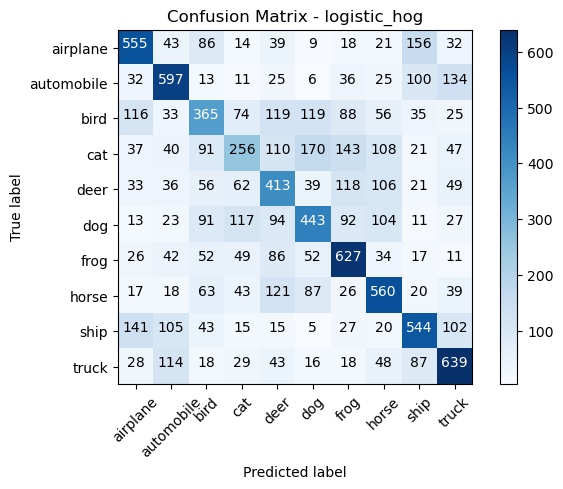

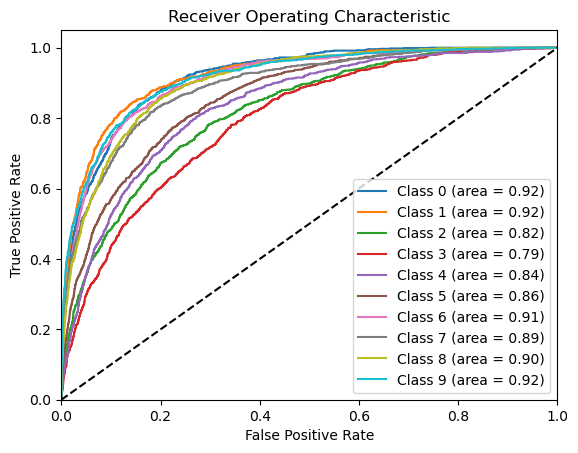

Model: logistic_sift
Confusion matrix, without normalization
[[   0    0    0    0  973    0    0    0    0    0]
 [   0    0    0    0  979    0    0    0    0    0]
 [   0    0    0    0 1030    0    0    0    0    0]
 [   0    0    0    0 1023    0    0    0    0    0]
 [   0    0    0    0  933    0    0    0    0    0]
 [   0    0    0    0 1015    0    0    0    0    0]
 [   0    0    0    0  996    0    0    0    0    0]
 [   0    0    0    0  994    0    0    0    0    0]
 [   0    0    0    0 1017    0    0    0    0    0]
 [   0    0    0    0 1040    0    0    0    0    0]]


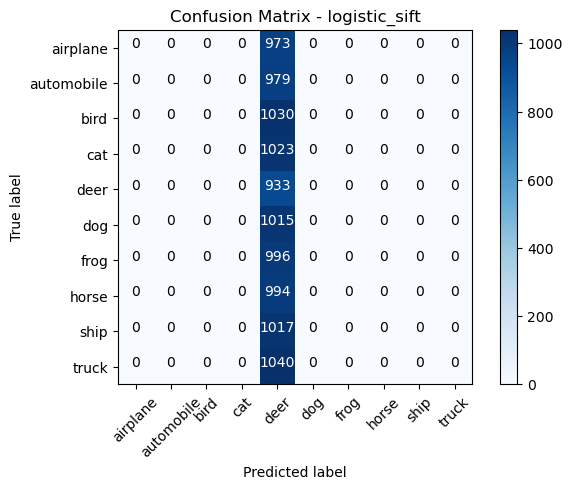

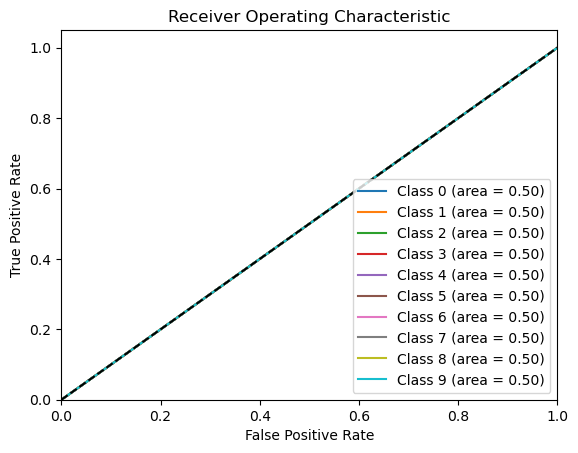

Model: logistic_flatten
Confusion matrix, without normalization
[[452  55  48  40  16  31  17  72 157  85]
 [ 53 487  29  34  22  37  50  43  58 166]
 [106  53 259  83 124  95 152  89  42  27]
 [ 42  76  98 277  65 195 133  45  41  51]
 [ 63  28 122  64 278  69 140 121  26  22]
 [ 29  50  87 180  79 332 110  78  41  29]
 [ 16  46  60 120  94  75 489  45  17  34]
 [ 50  45  59  75 133  67  53 410  32  70]
 [191  78  20  30  13  42  11  25 497 110]
 [ 82 196  17  25  12  30  48  58  96 476]]


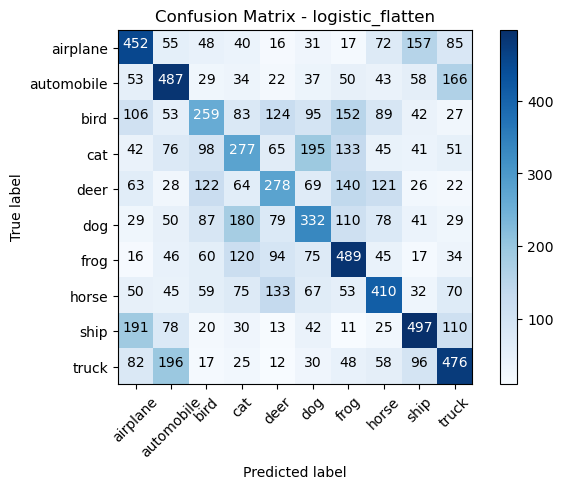

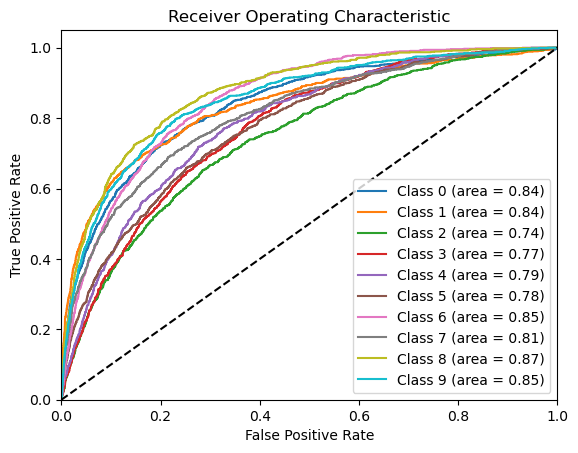

Model: random_forest_flatten
Confusion matrix, without normalization
[[537  54  30  19  28  32  21  35 146  71]
 [ 38 581  12  26  15  26  31  26  68 156]
 [ 90  57 290  73 150  75 142  63  47  43]
 [ 43  39  65 277  62 231 146  49  34  77]
 [ 69  23  89  43 405  48 118  71  36  31]
 [ 47  37  79 161  61 381 126  56  23  44]
 [ 16  21  61  60  94  69 595  24  21  35]
 [ 37  48  48  66 116  74  50 421  28 106]
 [ 98  83  11  26   7  43  15  15 656  63]
 [ 55 190   8  22   8  36  29  41  79 572]]


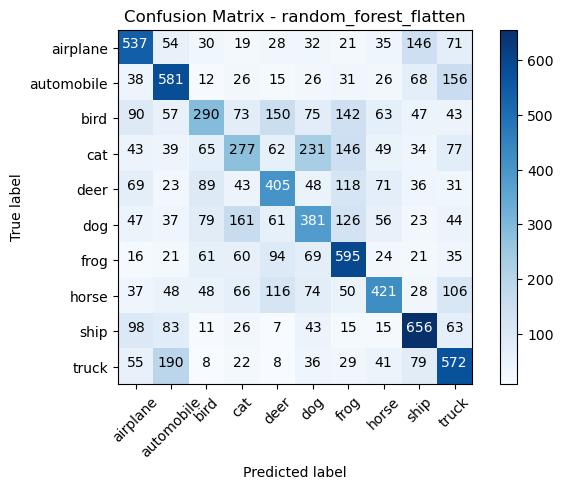

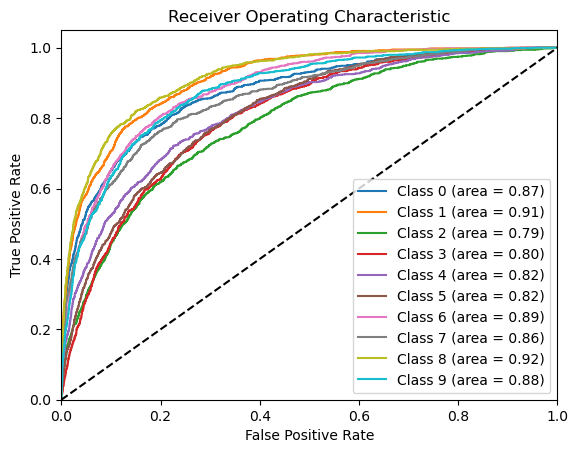

Model: random_forest_sift
Confusion matrix, without normalization
[[ 90  68 103  37 204  88  38 154 128  63]
 [ 24  98  85  62 137 163  32 234  50  94]
 [ 53 108 100  66 186  96  50 134 163  74]
 [ 33 137  78  61 149 152  65 158  80 110]
 [ 51 109  89  64 154 101  49 141  93  82]
 [ 12 133  56  70 153 172  60 151  56 152]
 [ 36 152  71  82 127 131  63 128  78 128]
 [ 28 151  47  59 156 108  49 216  57 123]
 [ 51  56 161  51 284  95  55 115 110  39]
 [ 21 110  51  65 149 163  65 238  50 128]]


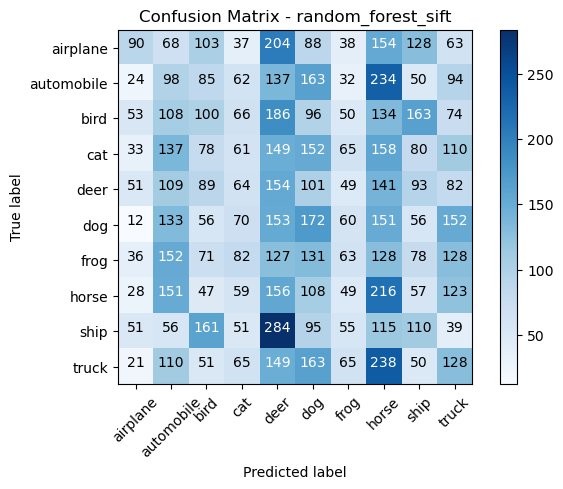

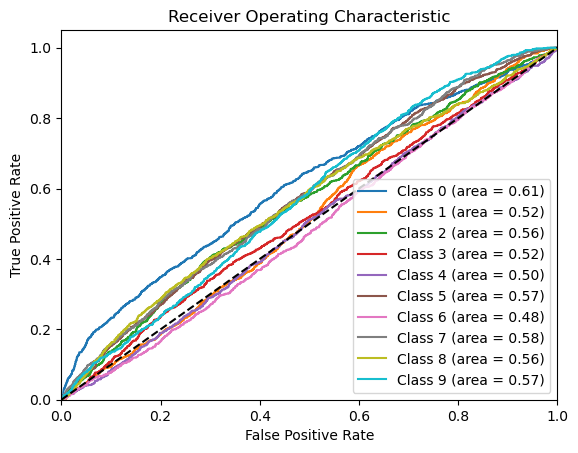

Model: random_forest_hog
Confusion matrix, without normalization
[[561  57  75  17  43  17  15  22 151  15]
 [ 33 654  10   8  17  13  36  14  97  97]
 [ 94  49 361  72  87 146 105  48  39  29]
 [ 37  38  68 245 101 246 144  78  13  53]
 [ 44  47  48  63 355  48 138 119  37  34]
 [ 10  18  82 103  80 510  89  87   5  31]
 [ 26  37  48  32  67  62 672  26  17   9]
 [ 41  30  51  34  83 121  36 534  15  49]
 [112 100  43  11  17  12  27  16 606  73]
 [ 33 125  12  15  40  23  27  60 100 605]]


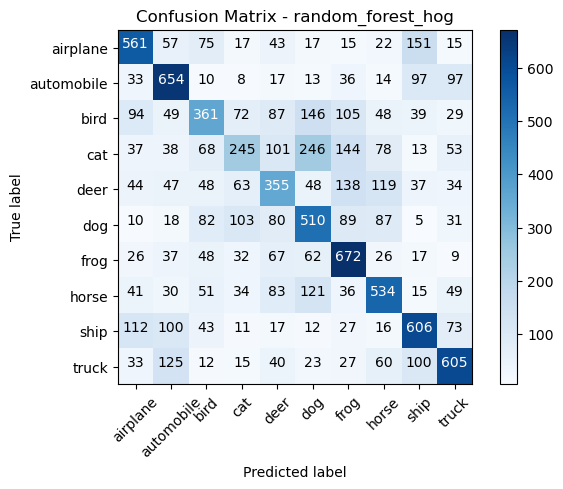

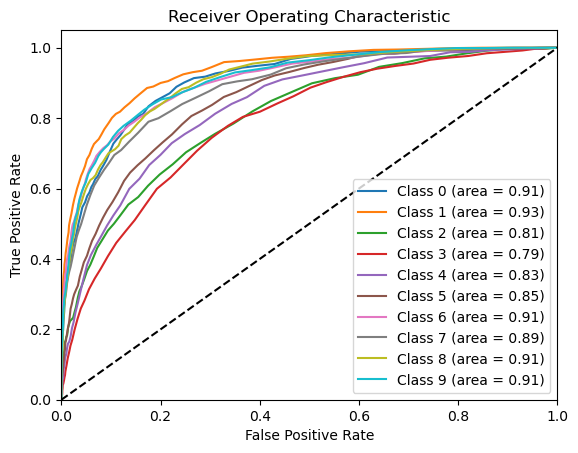

Model: svm_hog
Confusion matrix, without normalization
[[702  29  44  19  31   7  10  11  96  24]
 [ 28 752  10  14  16   3   9  10  63  74]
 [ 95  17 537  88 106  81  48  24  24  10]
 [ 46  23  89 423  84 179  86  56  15  22]
 [ 31  16  79  82 523  39  47  78  18  20]
 [ 18  10  99 176  61 520  42  68   6  15]
 [ 28  20  54  68  52  51 692  11  16   4]
 [ 23   9  45  57  83  63  19 667   4  24]
 [ 95  60  31  23  16   6   8  14 708  56]
 [ 25  92  14  38  28  23   9  30  53 728]]


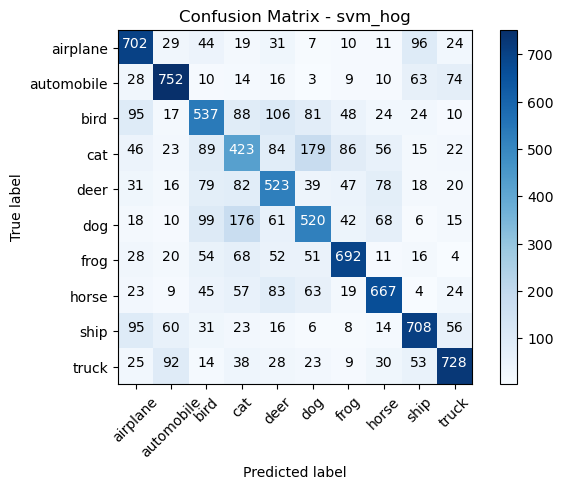

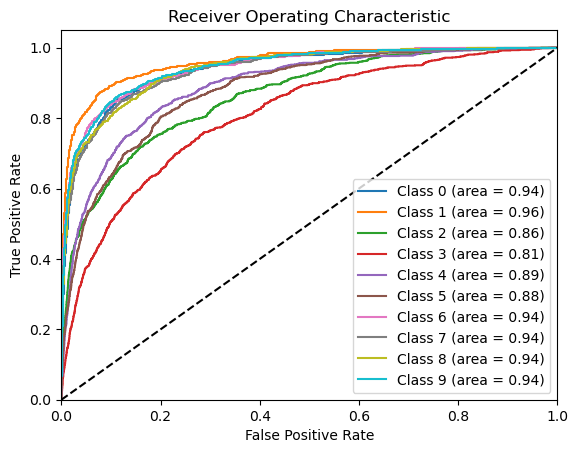

In [51]:
# Visualiser les matrices de confusion et les courbes ROC pour chaque modèle
for model_name, (y_pred, y_score) in predictions.items():
    print(f"Model: {model_name}")
    cm = confusion_matrix(y_val, y_pred)
    plot_confusion_matrix(cm, classes=LABEL_NAMES, title=f'Confusion Matrix - {model_name}')
    plot_roc_curve(y_val, y_score, n_classes=NUM_CLASSES)

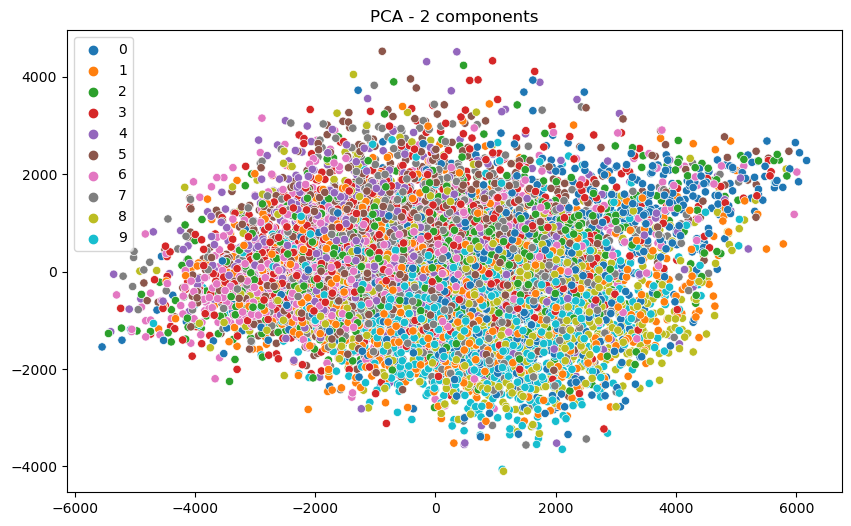

In [22]:
# visualization de l'espace latent
from sklearn.decomposition import PCA

X_val_flatten = extract_features(X_val, method='flatten')
pca = PCA(n_components=2)
X_val_pca = pca.fit_transform(X_val_flatten)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_val_pca[:, 0], y=X_val_pca[:, 1], hue=y_val, palette='tab10')
plt.title('PCA - 2 components')
plt.show()
